In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('breast-cancer.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
# Remove 'id' column as it's not useful
df = df.drop('id',axis=1)  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x = df.drop('diagnosis', axis=1)  
y=df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [24]:
x_scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [26]:
# Convert diagnosis to binary
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

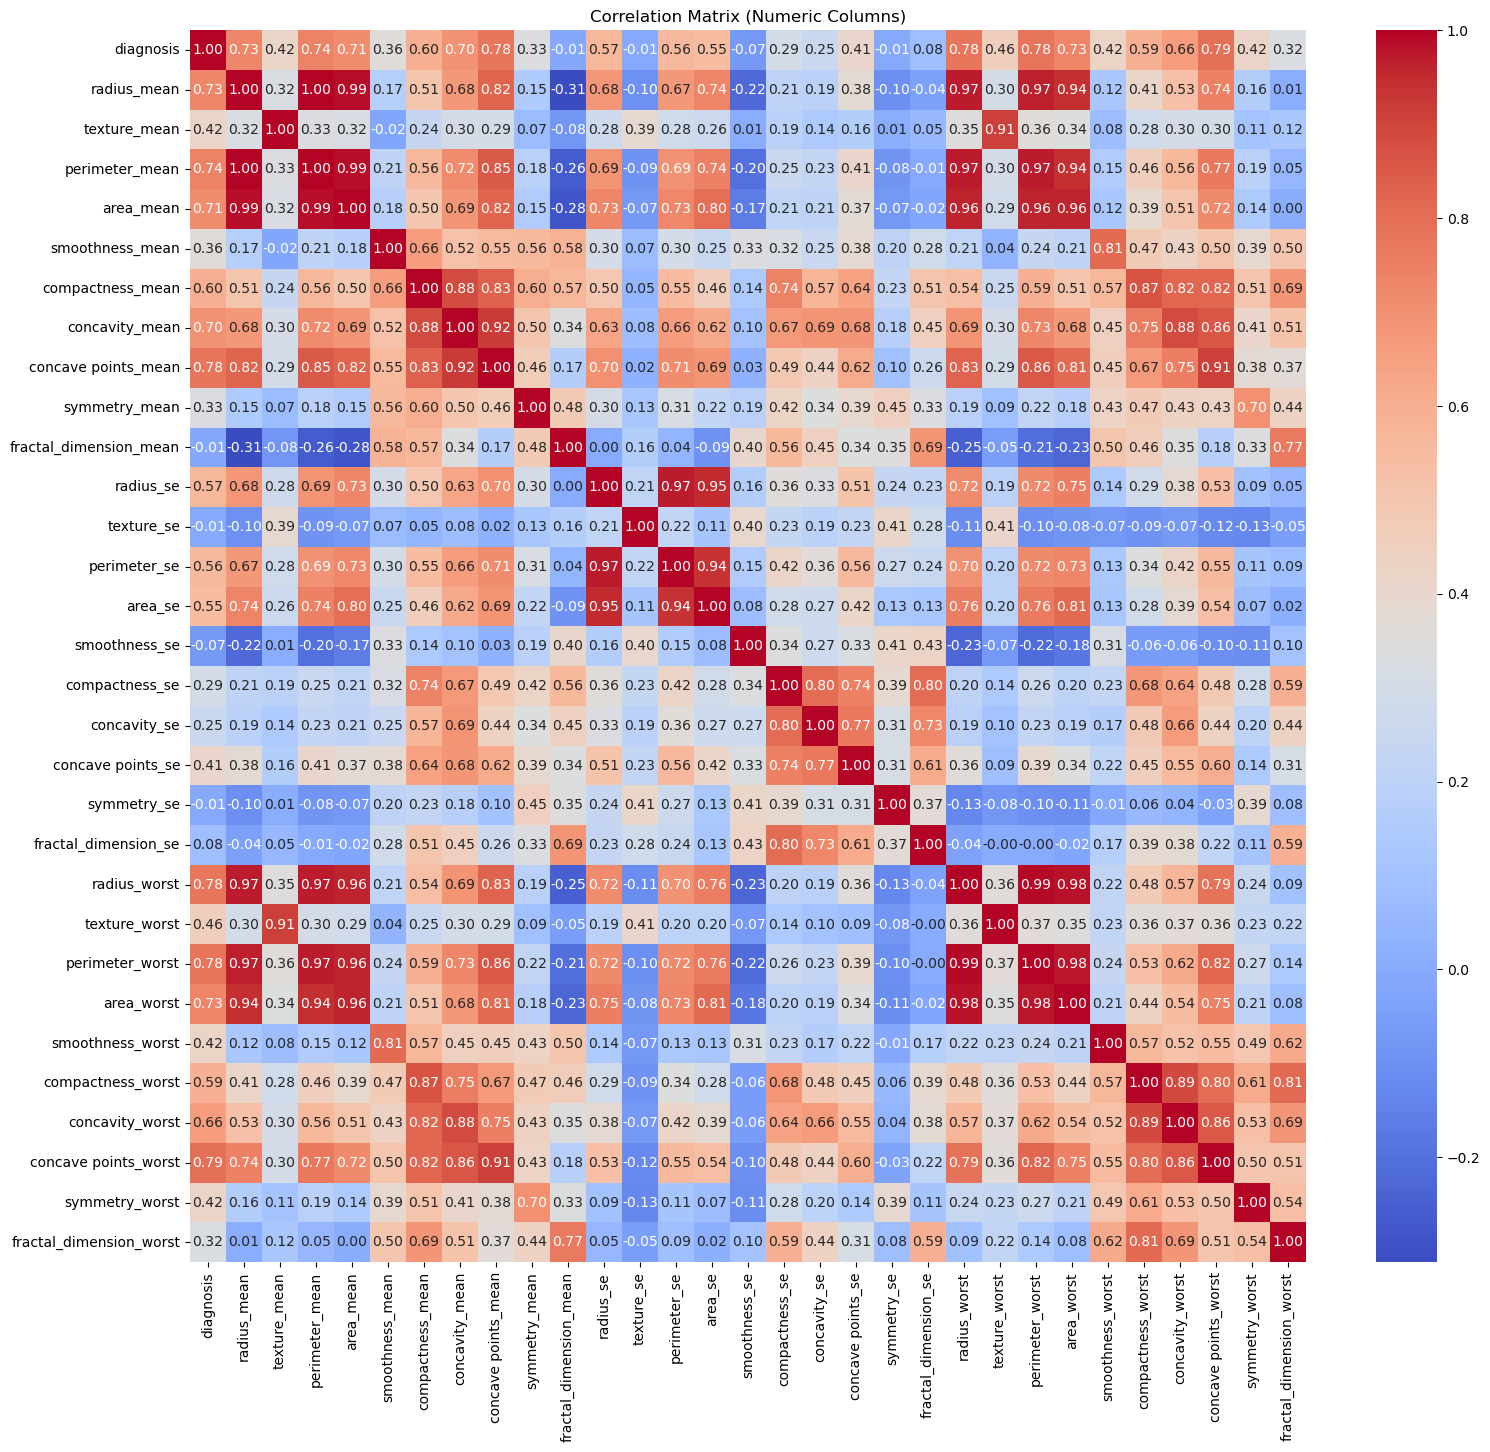

In [30]:
# Plot heatmap (only numeric columns)
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Columns)")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2812\3233891223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


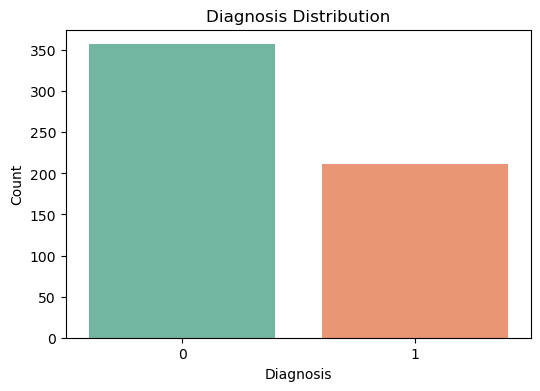

In [32]:
# Diagnosis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

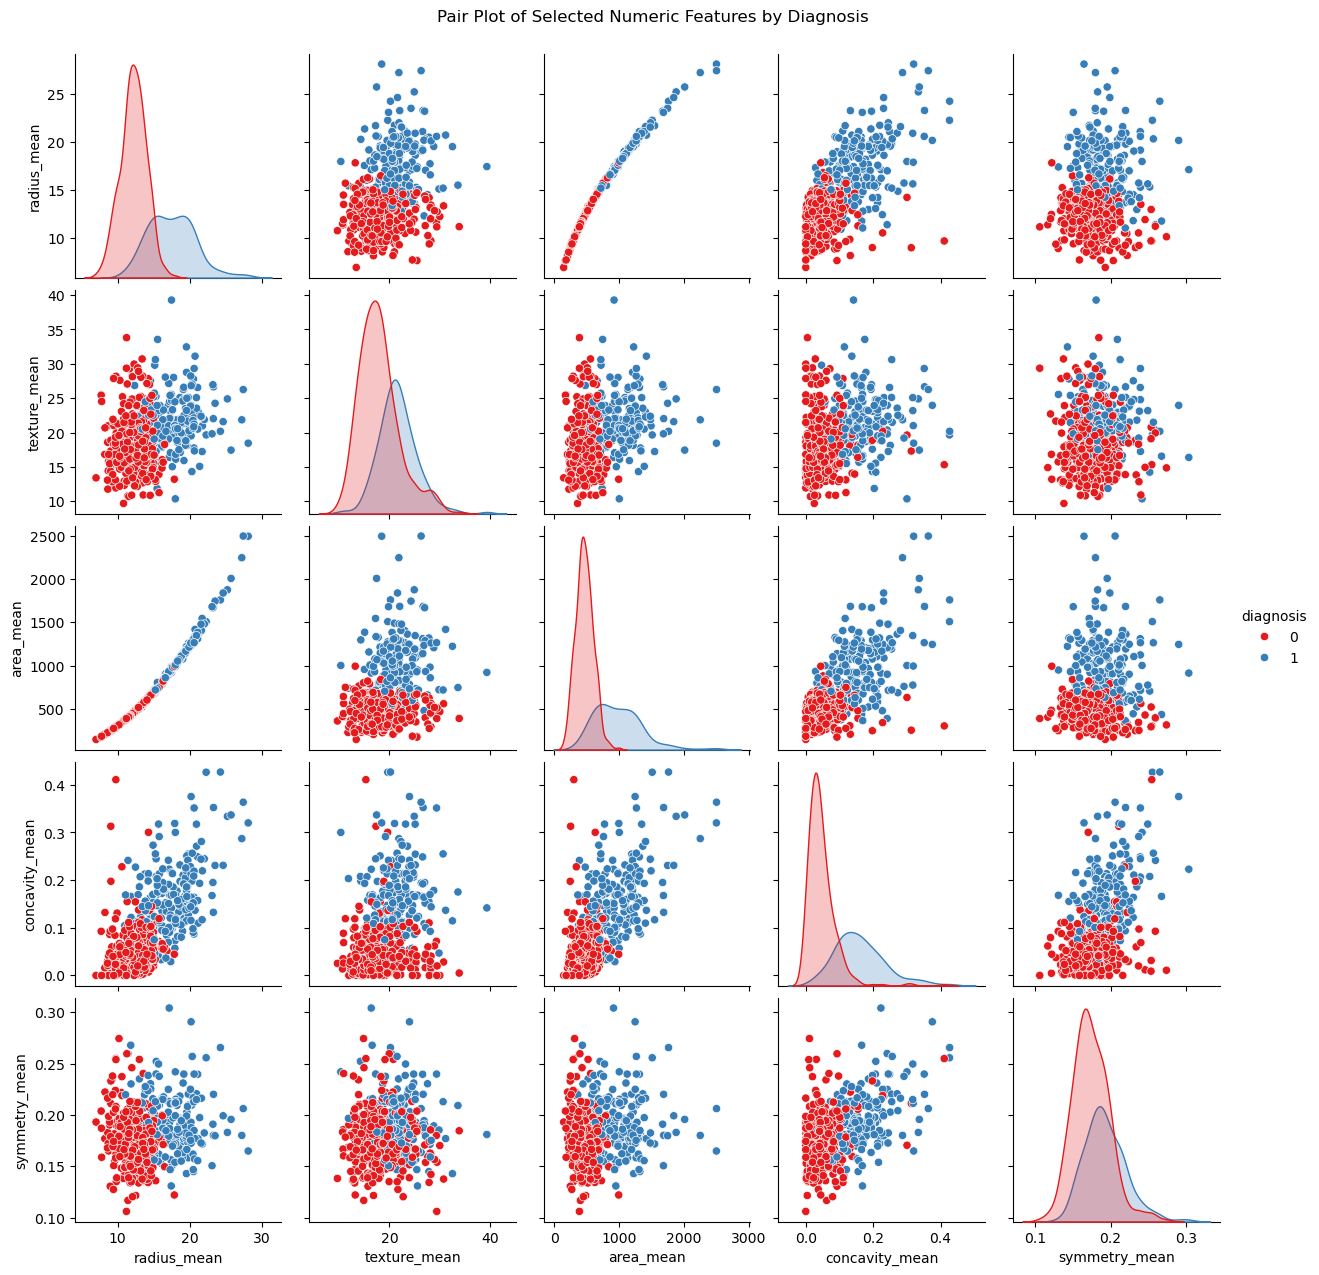

In [34]:
# # Select features and convert diagnosis to category for plotting
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean']
eda_df = df[selected_features + ['diagnosis']].copy()
eda_df['diagnosis'] = eda_df['diagnosis'].astype('category')

# # Ensure all are numeric and clean data
eda_df[selected_features] = eda_df[selected_features].apply(pd.to_numeric, errors='coerce')
eda_df = eda_df.dropna()

# # Pair plot
sns.pairplot(eda_df, hue='diagnosis', palette='Set1')
plt.suptitle('Pair Plot of Selected Numeric Features by Diagnosis', y=1.02)
plt.show()

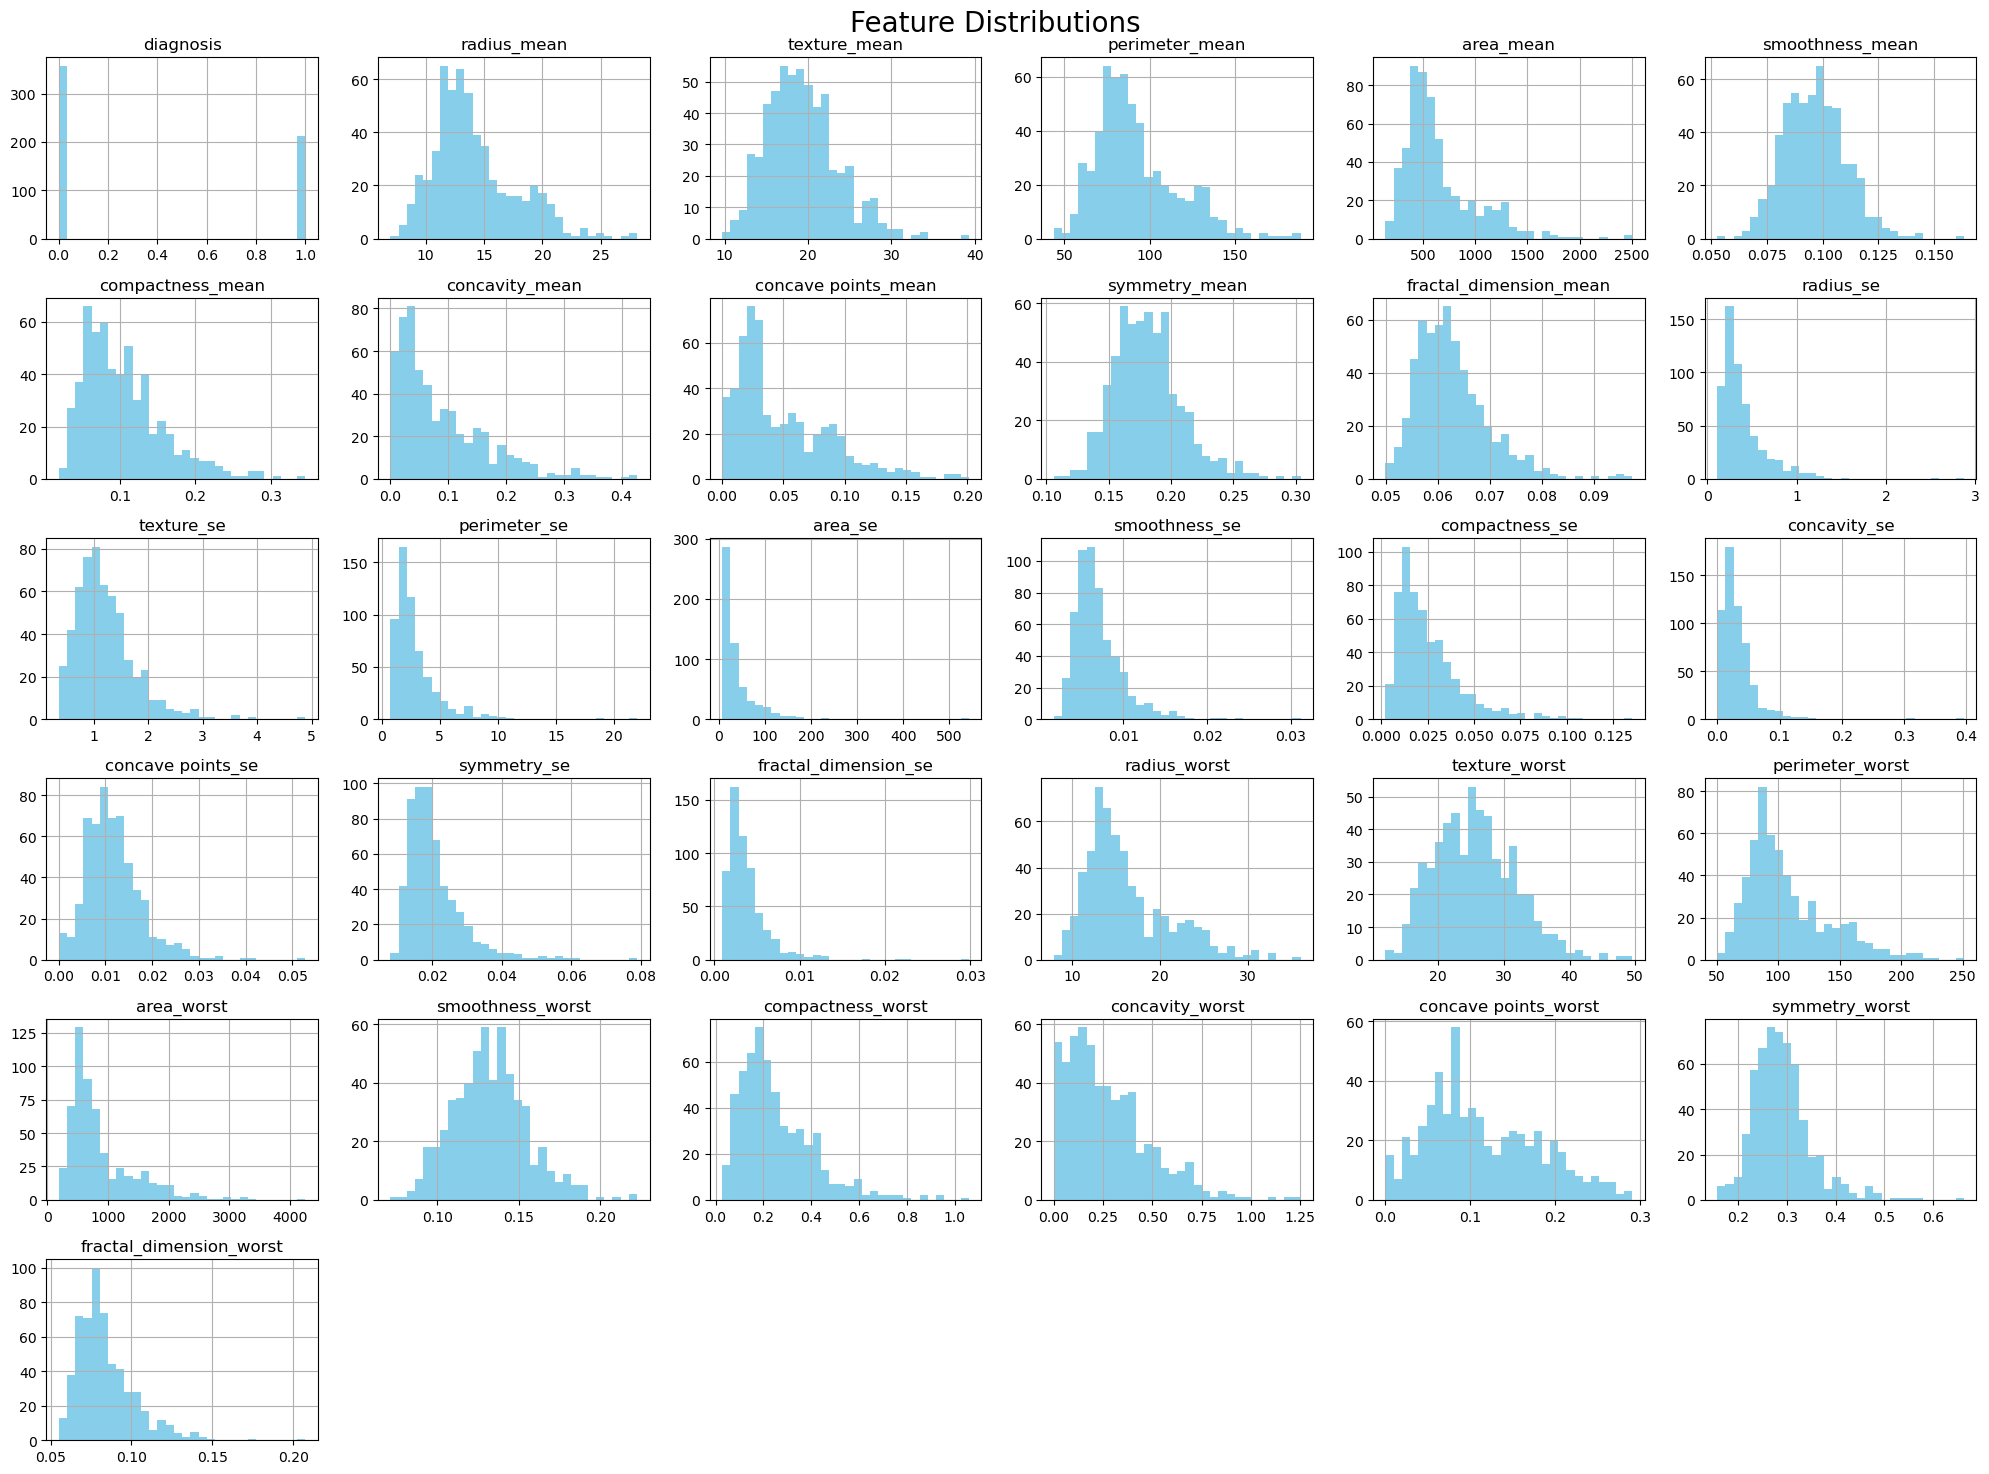

In [36]:
# Drop non-numeric columns if needed (like 'id' and 'diagnosis')
# df_numeric = df.drop(columns=['diagnosis'])
df.hist(bins=30, figsize=(20, 15), color='skyblue')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# SVM Models
svm_models = {
    "SVC (RBF kernel)": SVC(kernel='rbf'),
    "Linear SVM": SVC(kernel='linear'),
    "Polynomial SVM": SVC(kernel='poly', degree=3)
}


SVM Models:

SVC (RBF kernel) Accuracy: 0.9357
              precision    recall  f1-score   support

           B       0.91      1.00      0.95       108
           M       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



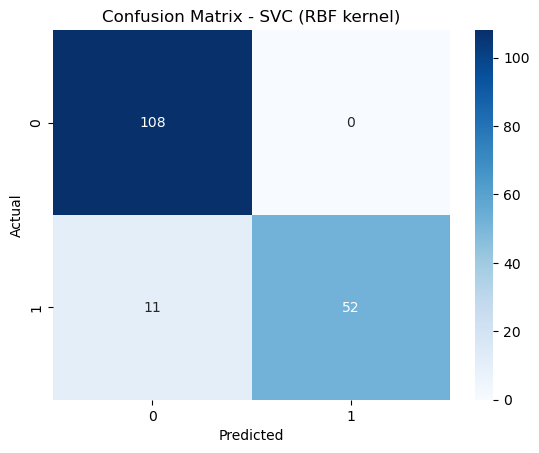

Linear SVM Accuracy: 0.9649
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



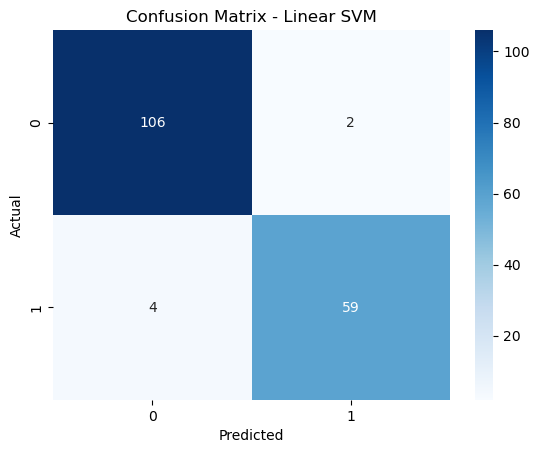

Polynomial SVM Accuracy: 0.9415
              precision    recall  f1-score   support

           B       0.92      0.99      0.96       108
           M       0.98      0.86      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171



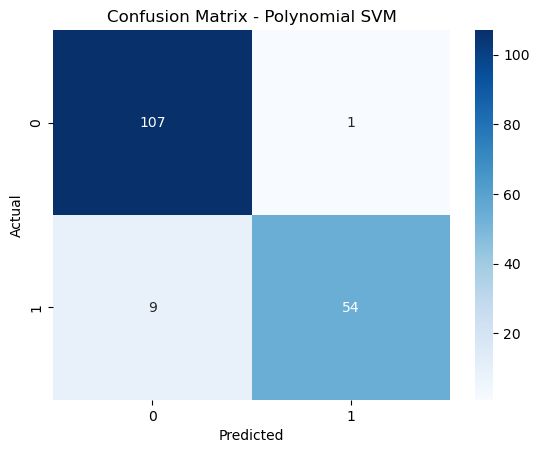

In [42]:
print("\nSVM Models:\n")
for name, model in svm_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/376.0 MB 4.5 MB/s eta 0:01:24
   ---------------------------------------- 2.4/376.0 MB 4.6 MB/s eta 0:01:21
   ---------------------------------------- 3.1/376.0 MB 4.3 MB/s eta 0:01:27
   ---------------------------------------- 3.9/376.0 MB 4.4 MB/s eta 0:01:24
    --------------------------------------- 4.7/376.0 MB 4.1 MB/s eta 0:01:30
    --------------------------------------- 5.8/376.0 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 6.6/376.0 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 7.3/376.0 MB 4.3 MB/s eta 0:01:27
    --------------------------------------- 8.4/376.0 MB 4.3 MB/s eta 0:01:27
   - -------------------------------------- 9.4/376.0 MB 4.3 MB/s eta 0:01:26
   - -------------------------------------- 10.2/376.0 MB 4.3 MB/s eta 0:01:26


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
df = pd.read_csv("breast-cancer.csv")

In [102]:
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode target

In [104]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=16, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7369 - loss: 0.6220 - val_accuracy: 0.8947 - val_loss: 0.4919
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8719 - loss: 0.4788 - val_accuracy: 0.9181 - val_loss: 0.3803
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9051 - loss: 0.3711 - val_accuracy: 0.9298 - val_loss: 0.2895
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9132 - loss: 0.2904 - val_accuracy: 0.9415 - val_loss: 0.2233
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9183 - loss: 0.2292 - val_accuracy: 0.9532 - val_loss: 0.1801
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.1710 - val_accuracy: 0.9591 - val_loss: 0.1495
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9429 - loss: 0.1713 - val_accuracy: 0.9708 - val_loss: 0.1293
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9413 - loss: 0.1497 - val_accuracy: 0.9708 - 

In [115]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9766


In [120]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Confusion Matrix:
[[106   1]
 [  3  61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



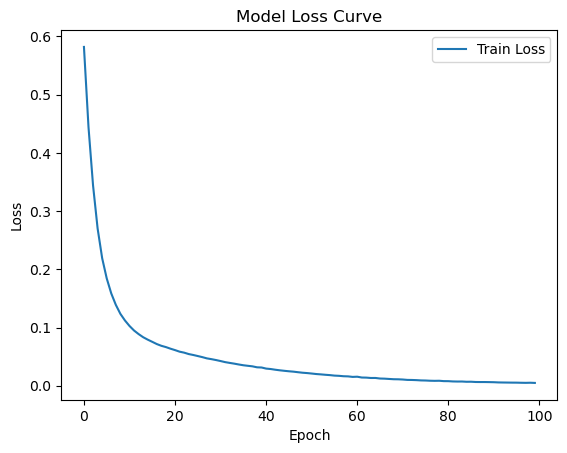

In [142]:
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score

In [128]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
svm_probs = svm_rbf.predict_proba(X_test)[:, 1]
svm_preds = svm_rbf.predict(X_test)

In [130]:
nn_probs = model.predict(X_test).ravel()
nn_preds = (nn_probs > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [132]:
def print_metrics(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

In [134]:
print_metrics("SVM (RBF Kernel)", y_test, svm_preds)
print_metrics("Neural Network", y_test, nn_preds)


SVM (RBF Kernel) Evaluation:
Accuracy: 0.9591
Precision: 1.0000
Recall: 0.8906
F1 Score: 0.9421
Confusion Matrix:
[[107   0]
 [  7  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Neural Network Evaluation:
Accuracy: 0.9766
Precision: 0.9839
Recall: 0.9531
F1 Score: 0.9683
Confusion Matrix:
[[106   1]
 [  3  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [136]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
auc_svm = auc(fpr_svm, tpr_svm)
auc_nn = auc(fpr_nn, tpr_nn)

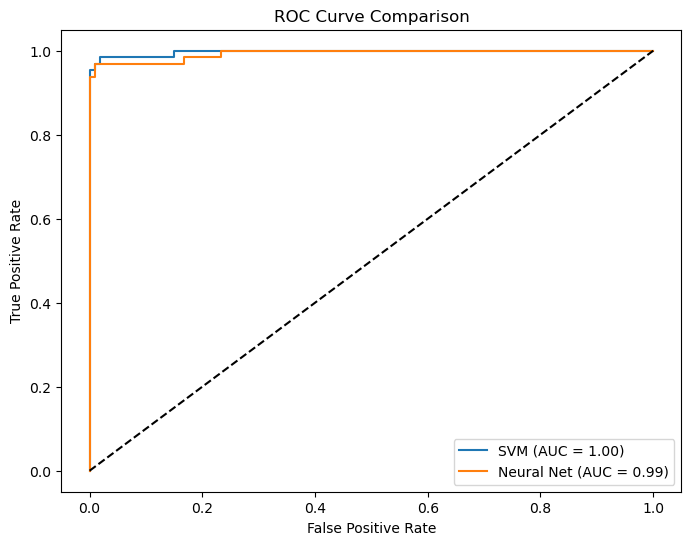

In [140]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Net (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()